In [1]:
import sys 
sys.path.append('../src/')

In [2]:
from GA_Clustering import GACluster
from matplotlib import pyplot as plt
import random
import numpy as np

In [3]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [4]:
random_state = 100
n_samples = 1500
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
colors = np.array(['r', 'g', 'b', 'y', 'p'])

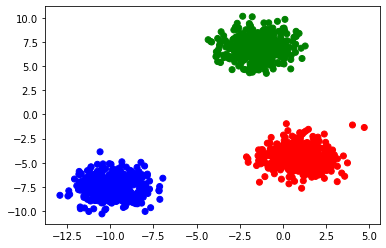

In [5]:
_ = plt.scatter(X[:, 0], X[:, 1],c = colors[y])

In [6]:
# X = list(map(lambda p: tuple(p), X))
len(X), X[0]

(1500, array([-1.55786982,  6.71214805]))

##  Rezultati - najbolji koji su dobijeni za date parametre

| max_iter | pop_size | category | t_size | mutation_rate | elitism_size |    sse   | silhouette_coef |  K_Means_SSE | K_means silhouette
| :------: | :------: | :-------:| :-----:| :-----------: | :-----------:| :-----------:| :-----------:|:-----------:|:-----------:|
| 10      |    4    | roulette |  /     |   0.05        |      2       |    3095         |   0.838 | 3095 | 0.838 |
| 4      |    4    | roulette |  /     |   0.1        |      2       |    3095         |   0.838 | 3095 | 0.838 |
| 4      |    4    | tournament |  2     |   0.05        |      2       |    3095         |   0.838 | 3095 | 0.838 |
| 10      |    10    | tournament |    2   |   0.1        |      2       |    3095         |   0.838 | 3095 | 0.838 |


* Na ovako lepo razdvojena 3 kalstera algoritam je u stanju da brzo nadje 'optimalne' centroide
* Dakle, nema smisla povecavati broj iteracija ili velicinu populacije
* Algoritam je nasao iste centroide kao KMeans
* On pri pocetnom generisanju centroida uspe da ubode po 1 tacku iz velikog klastera
* U nekim slucajevima to nije slucaj i algoritam losije radi za manji broj iteracija i manju populaciju, sto je i ocekivano

### 1)

In [7]:
model = GACluster(n_clusters=3, max_iter=10, population_size=4, mutation_rate=0.05, elitism_size=2)

<Figure size 720x180 with 0 Axes>

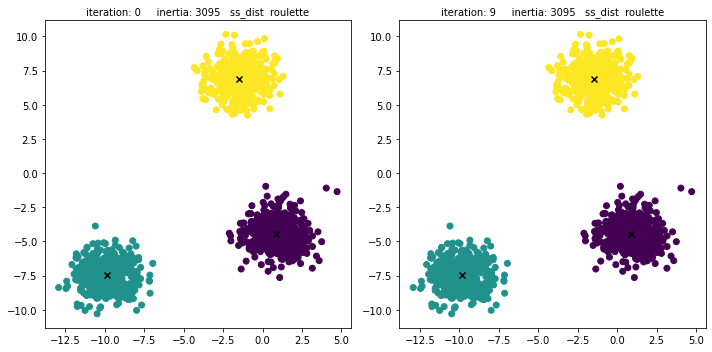

In [8]:
model.fit(X)

In [9]:
silhouette_score(X, labels=model.labels_)

0.838438616644274

### 2)

In [10]:
model = GACluster(n_clusters=3, max_iter=4, population_size=4, mutation_rate=0.1, elitism_size=2)

<Figure size 720x0 with 0 Axes>

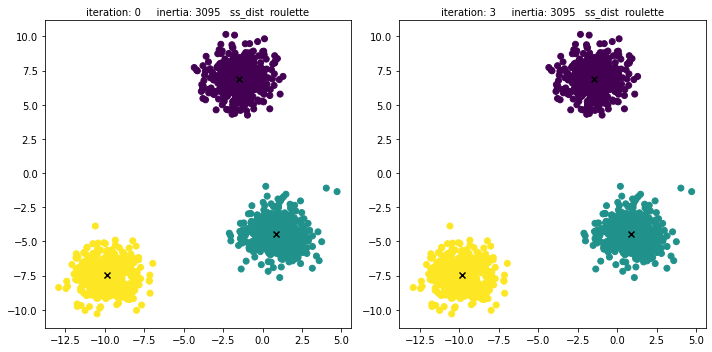

In [11]:
model.fit(X)

In [12]:
silhouette_score(X, model.labels_)

0.838438616644274

### 3)

In [13]:
model = GACluster(n_clusters=3, max_iter=4, category='tournament',population_size=4,
                  mutation_rate=0.05, elitism_size=2)

<Figure size 720x0 with 0 Axes>

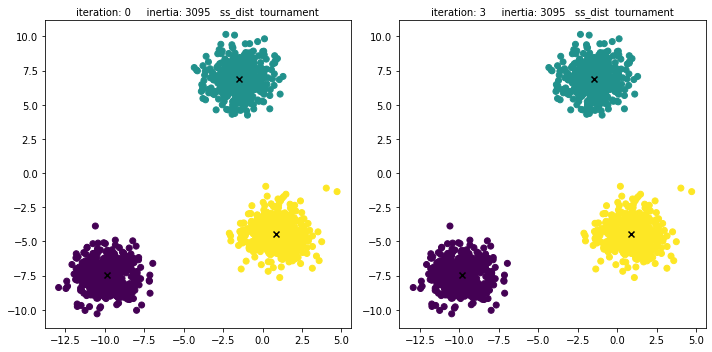

In [14]:
model.fit(X)

In [15]:
silhouette_score(X, labels=model.labels_)

0.838438616644274

### 4)

In [16]:
model = GACluster(n_clusters=3, max_iter=30, category='tournament', population_size=10,
                  mutation_rate=0.1, elitism_size=2)

<Figure size 720x540 with 0 Axes>

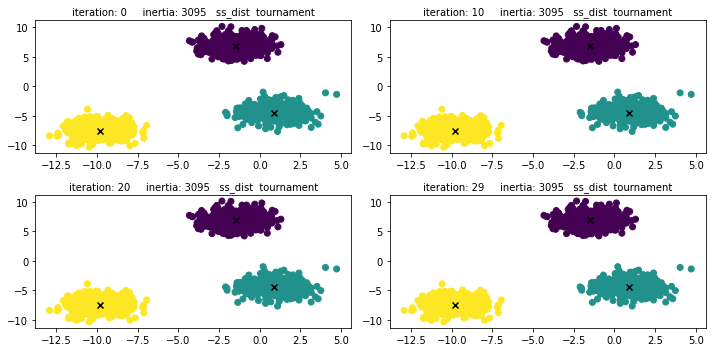

In [17]:
model.fit(X)

In [18]:
model.inertia_

3094.975305722011

## KMeans

In [19]:
model = KMeans(n_clusters=3)

In [20]:
model.fit(X)

KMeans(n_clusters=3)

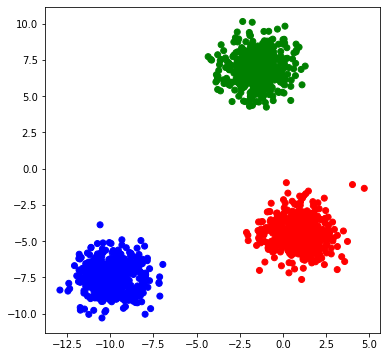

In [21]:
plt.figure(figsize=(6,6))
plt.scatter(x=X[:, 0], y=X[:, 1], c=colors[model.labels_])
plt.show()

In [22]:
model.inertia_

3094.975305722011

In [23]:
silhouette_score(X, model.labels_)

0.838438616644274